<h1>Proyecto 1</h1>

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score as AS
from sklearn.metrics import f1_score as F1
from sklearn.metrics import precision_score as PS
from sklearn.metrics import recall_score as RS
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, make_scorer
from sklearn.neighbors import KNeighborsClassifier

In [2]:
ruta = "./data/SuicidiosProyecto.csv"
df = pd.read_csv(ruta, encoding="utf-8")
df.columns

Index(['Unnamed: 0', 'text', 'class'], dtype='object')

In [3]:
df.sample(5)

,Unnamed: 0,text,class
89945,217931,26 applications put in for work this week All ...,non-suicide
141044,218366,"Should I tell her?? for some context, we are b...",non-suicide
32967,282293,The Suicide - Jorge Luis BorgesNot a star will...,suicide
120621,12682,A Hair Away From Breaking DownI'm a 20 year ol...,suicide
168864,139624,Would a girl make sexual jokes with someone sh...,non-suicide


In [4]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [5]:
df.dtypes

text     object
class    object
dtype: object

In [6]:
# size of the dataset
df.shape

(195700, 2)

In [7]:
df['class'].value_counts(dropna=False, normalize=True)

non-suicide    0.562928
suicide        0.437072
Name: class, dtype: float64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.80, random_state=28)

In [9]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((39140,), (156560,), (39140,), (156560,))

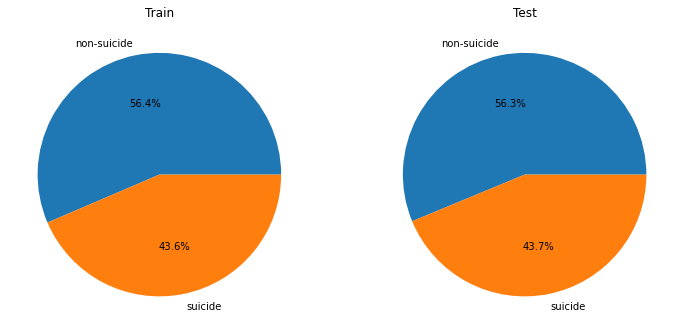

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].pie(y_train.value_counts(), labels=y_train.value_counts().index, autopct='%1.1f%%')
ax[0].set_title('Train')
ax[1].pie(y_test.value_counts(), labels=y_test.value_counts().index, autopct='%1.1f%%')
ax[1].set_title('Test')
plt.show()

In [11]:
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elpin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def tokenize(text):
    tokenizer = nltk.TweetTokenizer()
    return tokenizer.tokenize(text)

In [13]:
bow = CountVectorizer(tokenizer=tokenize, stop_words=stopwords)
x_train_bow = bow.fit_transform(x_train)
x_test_bow = bow.transform(x_test)
len(bow.get_feature_names())

66541

In [14]:
x_train_bow.shape

(39140, 66541)

tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words=stopwords)
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)
len(tfidf.get_feature_names())

In [15]:
bow_model = KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs=-1)
bow_model.fit(x_train_bow, y_train)

KNeighborsClassifier(n_jobs=-1, weights='distance')

In [16]:
print(x_train_bow.shape, x_test_bow.shape, y_train.shape, y_test.shape)

(39140, 66541) (156560, 66541) (39140,) (156560,)


In [17]:
# import traceback

# try:
#     bow_pred_train = bow_model.predict(x_train_bow)
#     bow_pred_test = bow_model.predict(x_train_bow)
# except Exception as e:
#     print(e)
#     traceback.print_exc()
    
    
bow_pred_train = bow_model.predict(x_train_bow)
bow_pred_test = bow_model.predict(x_train_bow)

: 

: 

In [ ]:
cm_train = confusion_matrix(y_train, bow_pred_train)
cm_test = confusion_matrix(y_test, bow_pred_test)
cm_train_norm = confusion_matrix(y_train, bow_pred_train, normalize='true')
cm_test_norm = confusion_matrix(y_test, bow_pred_test, normalize='true')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
ax[0, 0].set_title('Matriz de confusión de entrenamiento')
ax[0, 1].set_title('Matriz de confusión de prueba')
ax[1, 0].set_title('Matriz de confusión normalizada de entrenamiento')
ax[1, 1].set_title('Matriz de confusión normalizada de prueba')
fig1 = ConfusionMatrixDisplay(cm_train, display_labels=coder_severidad.values()).plot(ax=ax[0, 0])
fig2 = ConfusionMatrixDisplay(cm_test, display_labels=coder_severidad.values()).plot(ax=ax[0, 1])
fig3 = ConfusionMatrixDisplay(cm_train_n, display_labels=coder_severidad.values()).plot(ax=ax[1, 0])
fig4 = ConfusionMatrixDisplay(cm_test_n, display_labels=coder_severidad.values()).plot(ax=ax[1, 1])
plt.show()

NameError: name 'bow_pred_train' is not defined